In [130]:
import numpy as np
import matplotlib.pyplot as plt
import cebra 
import aux_functions as auxf
import pandas as pd
import seaborn as sns

In [131]:
params = {"font.family": "serif", "font.size": 19}  # Added font.size as an example
plt.rcParams.update(params)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
params = {"font.family": "serif", "font.size": 19}  # Added font.size as an example
plt.rcParams.update(params)

fig_path = './figures/results'
auxf.ensure_directory_exists(fig_path)


In [132]:
all_results = pd.read_csv('results_df/test_results/test_results.csv')

test_results = all_results[all_results['dataset'] == 3]

figure_ID = 'alldimred_test_results'

df_long_test = test_results.melt(id_vars=["dimred_type"], value_vars=["mvr2"], 
                  var_name="Metric", value_name="Value")



plot_replacement_dict = {
    'cebra_b' : 'CEBRA-Behaviour', 
    'cebra_h' : "CEBRA-Hybrid", 
    'cebra_t' : "CEBRA-Time", 
    'no_dimred' : "No DimRed", 
    'autoencoder' : "Autoencoder"
}

df_long_test['dimred_type'] = df_long_test['dimred_type'].replace(plot_replacement_dict)

df_long_test

catplot = sns.catplot(y="dimred_type", x="Value", hue="dimred_type", data=df_long_test, kind="bar", height=6, aspect=2, orient = 'h', palette='crest', errorbar= None)

plt.xticks()
plt.ylabel("")
plt.xlabel("Mean $R^2$")
plt.title("")
# plt.tight_layout()
catplot.set(xlim=(-0.5, 1))  # Adjust limits as needed
# catplot._legend.set_title(None)
# catplot._legend.set_bbox_to_anchor((0.95, 0.5)) # Adjust these values as needed
catplot.set(xlim=(0, 1))

plt.tight_layout()

plt.savefig(f"{fig_path}/{figure_ID}.png")

KeyError: 'dataset'

/tmp/ipykernel_89030/1152578335.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(channel_names)
/tmp/ipykernel_89030/1152578335.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(channel_names)


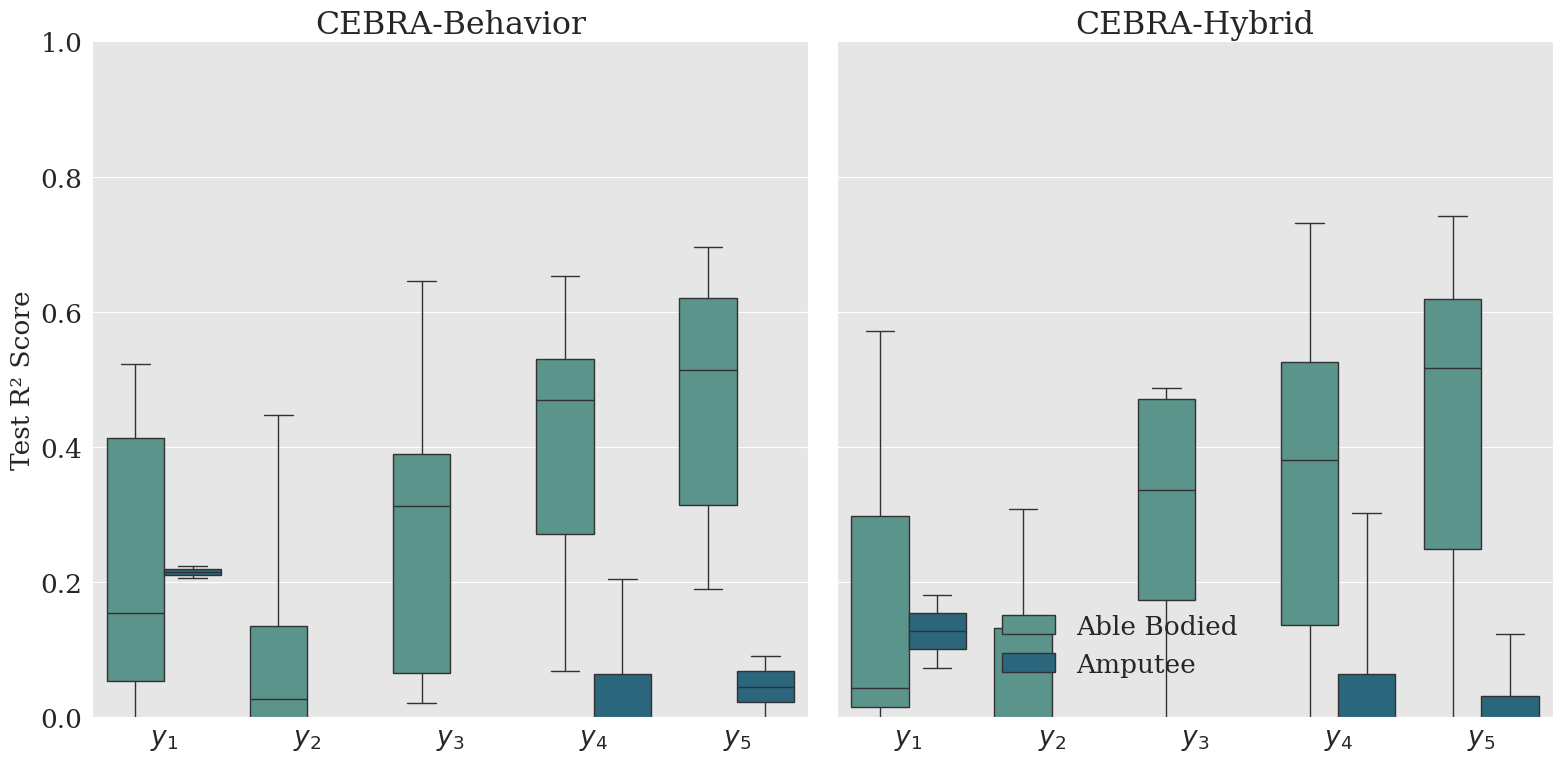

In [ ]:
figure_ID = 'cebra_b_h_whiskerplot'

# Selected dimensionality reduction methods
dim_red_list_temp1 = ["CEBRA_hybrid", "CEBRA_BehContr"]

# Directory containing the results
regression_dir = './regression_results'

# Channel names to be used as x-tick labels
# channel_names = ['Thumb rotation', 'Thumb flexion', 'Index flexion', 'Middle flexion', 'Ring/little flexion']
channel_names = ['$y_1$', '$y_2$', '$y_3$', '$y_4$', '$y_5$']

plot_names = ["CEBRA-Behavior", "CEBRA-Hybrid"]
dimred_toplot = ['cebra_b', 'cebra_h']
channel_names = ['$y_1$', '$y_2$', '$y_3$', '$y_4$', '$y_5$']


test_results = pd.read_csv('results_df/test_results/test_results.csv')

fig, axes = plt.subplots(nrows=1, ncols=len(plot_names), figsize=(16, 8), sharey=True)

r2_scores = test_results
r2_scores['Group'] = r2_scores['user'].apply(lambda x: 'Able Bodied' if x in range(1, 11) else 'Amputee')

r2_scores = r2_scores.drop(columns =['mvr2', 'user'])

r2_scores = r2_scores.melt(id_vars = ["dimred_type", 'Group'], value_vars = ["DoA1", "DoA2", "DoA3", "DoA4", "DoA5"], var_name = 'DoA', value_name = '$R^2$')


for idx, dimred in enumerate(dimred_toplot):

    r2_scores_filtered = r2_scores[r2_scores['dimred_type'] == dimred]

    # Create a box plot in the corresponding subplot
    ax = axes[idx]
    sns.boxplot(x='DoA', y='$R^2$', hue='Group', data=r2_scores_filtered, ax=ax, palette="crest", flierprops={'marker': 'x', 'markersize': 5, 'markeredgecolor': 'gray'})
    ax.set_title(f'{plot_names[idx]}')
    ax.set_ylabel('Test R² Score')
    ax.set_xlabel('')

    if idx > 0:
        ax.set_ylabel('')  

    # Remove legend from individual subplots
    if idx == 0:
        handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()  

    ax.set_ylim(0, 1)    
    ax.set_xticklabels(channel_names)


# Add a single legend without a title, outside the plots
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.8, 0.1), frameon=False)
# fig.tight_layout(rect=[0, 0, 0.9, 0.9])  
fig.tight_layout()  

plt.savefig(f"{fig_path}/{figure_ID}.png")
